# Zero-Shot Classification

In [3]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Capstone/lib')

import helper_functions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

df = pd.read_csv('data/processed_data.csv')

In [2]:
import transformers
from transformers import pipeline

In [3]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

## Sample Classification

In [4]:
list(df['review_text'])[4]

'Granules are easy to spread over ant mounds and works in a couple of days'

In [5]:
sample_review = "however, I should have done a cost comparison before buying. This product sells for less than half at the local store. Im sure its a wonderful product for plants and grass. Ill be buying this at the local Home Depot/Lowes."

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'however, I should have done a cost comparison before buying. This product sells for less than half at the local store. Im sure its a wonderful product for plants and grass. Ill be buying this at the local Home Depot/Lowes.',
 'labels': ['quality', 'affordability', 'satisfaction', 'complaints'],
 'scores': [0.965654194355011,
  0.7316663861274719,
  0.3633531928062439,
  0.3535432815551758]}

In [6]:
sample_review = "had some evergreen bushes and Cyprus trees that were browning, using the Ironite did the trick"

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'had some evergreen bushes and Cyprus trees that were browning, using the Ironite did the trick',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.8587943315505981,
  0.5197843909263611,
  0.2567302882671356,
  0.062313262373209]}

In [7]:
sample_review = "Followed the instructions and the ants actually took the bait initially but when I checked the hill again I could see the ants carrying the bait out of the hole."

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Followed the instructions and the ants actually took the bait initially but when I checked the hill again I could see the ants carrying the bait out of the hole.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9686164855957031,
  0.8710137009620667,
  0.3163824677467346,
  0.011083382181823254]}

In [8]:
sample_review = "Granules are easy to spread over ant mounds and works in a couple of days"

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Granules are easy to spread over ant mounds and works in a couple of days',
 'labels': ['quality', 'affordability', 'satisfaction', 'complaints'],
 'scores': [0.9323953986167908,
  0.8096542954444885,
  0.3428742587566376,
  0.022626765072345734]}

# Zero Shot Classification Demo

In [9]:
df_test = df.sample(frac = 0.015)
len(df_test)
df_test.to_csv('data\play_data.csv')

432

In [13]:
df_test = pd.read_csv('data/play_data.csv')

In [11]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [12]:
type = ['cost', 'efficient', 'effective', 'ease of use']

In [13]:
sample_review = "however, I should have done a cost comparison before buying. \
    This product sells for less than half at the local store. Im sure its a wonderful product for plants and grass. \
        Ill be buying this at the local Home Depot/Lowes."

res = classifier(
    sample_review,
    candidate_labels = type, 
    multi_label = True
)
res

{'sequence': 'however, I should have done a cost comparison before buying.     This product sells for less than half at the local store. Im sure its a wonderful product for plants and grass.         Ill be buying this at the local Home Depot/Lowes.',
 'labels': ['cost', 'effective', 'efficient', 'ease of use'],
 'scores': [0.9885620474815369,
  0.9799482822418213,
  0.48718661069869995,
  0.30008333921432495]}

In [14]:
#setting empty values for the columns
index = -1
for label in type:
    df_test[label + '_m'] = -1

for j in range(len(df_test)):
    #counter for progress/debugging
    index+=1
    if(index%100 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df_test.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df_test[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
100
200
300
400


In [16]:
list(df_test['review_lower'][1:3])

['waiting for it to work.  will write more later',
 '[this review was collected as part of a promotion.] grass grows fast and a lot of weeds. this works excellent in killing the weeds out. definitely recommend . . it was easy to use just hook it to a hose and start spray. i had a section of grass that had weeds through out it ..']

In [18]:
list(df_test['review_lower'][1:3])

df_test2 = pd.concat([df_test['review_lower'], df_test['cost_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['efficient_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['effective_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['ease of use_m']],axis=1)
df_test2[1:3]

KeyError: 'cost_m'

# sentiment Analysis

In [16]:
#sample sentiment analysis
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sample_review = "however, I should have done a cost comparison before buying. \
    This product sells for less than half at the local store. Im sure its a wonderful product for plants and grass. \
        Ill be buying this at the local Home Depot/Lowes."

result = sentiment_pipeline(sample_review)

result

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'Positive', 'score': 0.9085711240768433}]

In [17]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df_test['review_lower']:
    index+=1
    if(index%100 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df_test['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
100
200
300
400


In [18]:
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test.to_csv('data\demo_data.csv')

In [64]:
df_test = pd.read_csv('data\demo_data.csv')

In [61]:
list(df_test['review_lower'][13:14])

#df_test2 = pd.concat([df_test['review_lower'], df_test['cost_m']],axis=1)
df_test2 = pd.concat([df_test['cost_m'], df_test['efficient_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['effective_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['ease of use_m']],axis=1)
df_test2[13:14]

['nice quality sunflower seed, the cardinals and squirrels love it.']

,cost_m,efficient_m,effective_m,ease of use_m
13,0.232189,0.891521,0.993074,0.289773


In [65]:
df_test2 = pd.concat([df_test['review_lower'], df_test['cost_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['efficient_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['effective_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['ease of use_m']],axis=1)
df_test2 = pd.concat([df_test2, df_test['sentiment']],axis=1)
df_test2.head(10)
#df_test2 = df_test2.drop(columns=['sentiment_score'])

,review_lower,cost_m,efficient_m,effective_m,ease of use_m,sentiment
0,this works great for keeping the brass from gr...,0.251741,0.998199,0.999644,0.376084,Positive
1,waiting for it to work. will write more later,0.325730,0.027556,0.012378,0.095561,Positive
2,[this review was collected as part of a promot...,0.531525,0.998460,0.999477,0.999256,Positive
3,i received product reimbursement in exchange f...,0.716651,0.968388,0.996363,0.774749,Positive
4,apperently applied to late for over seeding on...,0.512670,0.004041,0.107014,0.000599,Neutral
5,didnt kill the clover as advertised,0.484849,0.661762,0.141271,0.241425,Negative
6,our outdoor visitors love it.,0.058992,0.804328,0.990509,0.822399,Positive
7,the ironite 15 lbs. mineral supplement will he...,0.496476,0.831219,0.995285,0.279123,Positive
8,came in convenient size bag. only problem the ...,0.142433,0.384228,0.167885,0.296941,Positive
9,[this review was collected as part of a promot...,0.134792,0.998101,0.999398,0.924376,Positive


In [20]:
#list(df_test2['review_lower'])[:5]

In [5]:
df_demo = pd.read_csv('data\demo_data.csv')
df_demo = df_demo.drop(columns=['Unnamed: 0'])
df_demo = df_demo.drop(columns=['Unnamed: 0.1'])
df_demo

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,cost_m,efficient_m,effective_m,ease of use_m,sentiment
0,Garden,67956,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,No,2021-07-30T00:00:00,2021,7,30,JUST AS GOOD AS ROUND UP AT A LOT LESS EXPENSE!!,tHIS WORKS GREAT FOR KEEPING THE BRASS FROM GR...,organic reviews,2.88,5,0,0,0,No,this works great for keeping the brass from gr...,2021-07-30,24,0.251741,0.998199,0.999644,0.376084,Positive
1,Garden,12228,IMAGE Herbicide Brush & Vine Killer Concentrate,http://www.homedepot.com/p/t/100201080,Homedepot,Image for Weeds,100201080,100201080,No,2021-06-25T00:00:00,2021,6,25,waiting for it to work. Will write more later...,waiting for it to work. Will write more later,organic reviews,20.44,3,0,0,0,No,waiting for it to work. will write more later,2021-06-25,10,0.325730,0.027556,0.012378,0.095561,Positive
2,Garden,141858,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,Image for Weeds,311670269,311670269,Yes,2022-06-27T00:00:00,2022,6,26,Amazing,[This review was collected as part of a promot...,syndicated reviews,15.47,5,2,0,0,Yes,[this review was collected as part of a promot...,2022-06-27,56,0.531525,0.998460,0.999477,0.999256,Positive
3,Garden,78430,Lawn Booster Sun & Shade 9.6lb bag,https://www.walmart.com//ip/Pennington-Lawn-Bo...,Walmart,Pennington Grass,577439020,577439020,Yes,2022-03-25T00:00:00,2022,3,12,Smart garden product,I received product reimbursement in exchange f...,organic reviews,16.88,4,0,0,0,No,i received product reimbursement in exchange f...,2022-03-25,72,0.716651,0.968388,0.996363,0.774749,Positive
4,Garden,70299,Annual Ryegrass 50lb bag,http://www.homedepot.com/p/100333277,Homedepot,Pennington Grass,100333280,100333277,Yes,2021-12-17T00:00:00,2021,12,50,Fall over seeding,Apperently applied to late for over seeding on...,organic reviews,66.97,3,0,0,0,No,apperently applied to late for over seeding on...,2021-12-17,14,0.512670,0.004041,0.107014,0.000599,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Garden,132485,Lawn Booster Sun & Shade 9.6lb bag,http://www.homedepot.com/p/311569530,Homedepot,Pennington Grass,311569530,311569530,Yes,2022-05-26T00:00:00,2022,5,21,Good luck,This product is terrible I followed the instru...,organic reviews,19.97,1,0,0,0,No,this product is terrible i followed the instru...,2022-05-26,37,0.917777,0.000561,0.001384,0.000556,Negative
428,Garden,70268,Alaska 5-1-1 Fish Fertilizer 5 Gal Bucket (con...,https://www.homedepot.com/p/Alaska-640-oz-5-Ga...,Homedepot,Pennington Fertilizer,202949934,202949934,Yes,2021-12-22T00:00:00,2021,12,51,This should last an entire year for all of my...,This should last an entire year for all of my ...,organic reviews,99.97,5,0,0,0,No,this should last an entire year for all of my ...,2021-12-22,17,0.372292,0.981484,0.994850,0.375882,Positive
429,Garden,134305,Sevin Ready-to-Use 1 gal.,https://www.lowes.com/pd/Sevin-1-Gallon-Garden...,Lowes,GardenTech,50261725,50261725,No,2022-05-26T00:00:00,2022,5,21,Ants,[This review was collected as part of a promot...,syndicated reviews,16.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-26,63,0.596595,0.335173,0.587987,0.041030,Negative
430,Garden,136156,Smart Seed Dense Shade Mixture 7lb bag,https://www.lowes.com/pd/Pennington-Smart-Seed...,Lowes,Pennington Grass,5013148065,5013148065,Yes,2022-05-23T00:00:00,2022,5,21,Easy to use,[This review was collected as part of a promot...,syndicated reviews,38.88,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-23,44,0.366942,0.982708,0.996560,0.993777,Positive

In [10]:
df_demo['max'] = df_demo[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df_demo.head()
#cost_m	efficient_m	effective_m	ease of use_m

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,cost_m,efficient_m,effective_m,ease of use_m,sentiment,max
0,Garden,67956,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,No,2021-07-30T00:00:00,2021,7,30,JUST AS GOOD AS ROUND UP AT A LOT LESS EXPENSE!!,tHIS WORKS GREAT FOR KEEPING THE BRASS FROM GR...,organic reviews,2.88,5,0,0,0,No,this works great for keeping the brass from gr...,2021-07-30,24,0.251741,0.998199,0.999644,0.376084,Positive,0.999644
1,Garden,12228,IMAGE Herbicide Brush & Vine Killer Concentrate,http://www.homedepot.com/p/t/100201080,Homedepot,Image for Weeds,100201080,100201080,No,2021-06-25T00:00:00,2021,6,25,waiting for it to work. Will write more later...,waiting for it to work. Will write more later,organic reviews,20.44,3,0,0,0,No,waiting for it to work. will write more later,2021-06-25,10,0.325730,0.027556,0.012378,0.095561,Positive,0.325730
2,Garden,141858,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,Image for Weeds,311670269,311670269,Yes,2022-06-27T00:00:00,2022,6,26,Amazing,[This review was collected as part of a promot...,syndicated reviews,15.47,5,2,0,0,Yes,[this review was collected as part of a promot...,2022-06-27,56,0.531525,0.998460,0.999477,0.999256,Positive,0.999477
3,Garden,78430,Lawn Booster Sun & Shade 9.6lb bag,https://www.walmart.com//ip/Pennington-Lawn-Bo...,Walmart,Pennington Grass,577439020,577439020,Yes,2022-03-25T00:00:00,2022,3,12,Smart garden product,I received product reimbursement in exchange f...,organic reviews,16.88,4,0,0,0,No,i received product reimbursement in exchange f...,2022-03-25,72,0.716651,0.968388,0.996363,0.774749,Positive,0.996363
4,Garden,70299,Annual Ryegrass 50lb bag,http://www.homedepot.com/p/100333277,Homedepot,Pennington Grass,100333280,100333277,Yes,2021-12-17T00:00:00,2021,12,50,Fall over seeding,Apperently applied to late for over seeding on...,organic reviews,66.97,3,0,0,0,No,apperently applied to late for over seeding on...,2021-12-17,14,0.512670,0.004041,0.107014,0.000599,Neutral,0.512670


[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0

0.8888888888888888

['[this review was collected as part of a promotion.] grass grows fast and a lot of weeds. this works excellent in killing the weeds out. definitely recommend . . it was easy to use just hook it to a hose and start spray. i had a section of grass that had weeds through out it ..']

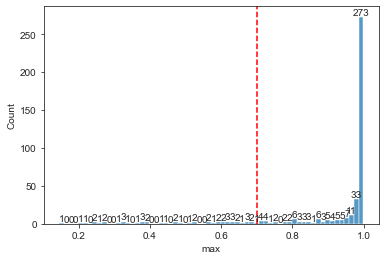

In [46]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df_demo);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);
plt.savefig('figs/zsc_07.jpg', bbox_inches = 'tight');

len(df_demo[df_demo['max'] > 0.7])/len(df_demo['max'])
#subcategories of quality. may be too broad


list(df_demo[df_demo['max'] > 0.7]['review_lower'][1:2])

[Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '46'),
 Text(0, 0, '44'),
 Text(0, 0, '37'),
 Text(0, 0, '51'),
 Text(0, 0, '46'),
 Text(0, 0, '32'),
 Text(0, 0, '45'),
 Text(0, 0, '52')]

0.29398148148148145

['packages are way too small and way too expensive']

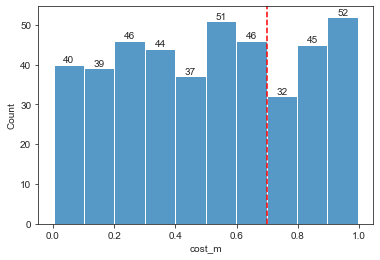

In [39]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'cost_m', data = df_demo);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df_demo[df_demo['cost_m'] > 0.7])/len(df_demo['cost_m'])
#subcategories of quality. may be too broad


list(df_demo[df_demo['cost_m'] > 0.7]['review_lower'][1:2])

[Text(0, 0, '74'),
 Text(0, 0, '17'),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '35'),
 Text(0, 0, '227')]

0.6574074074074074

['[this review was collected as part of a promotion.] grass grows fast and a lot of weeds. this works excellent in killing the weeds out. definitely recommend . . it was easy to use just hook it to a hose and start spray. i had a section of grass that had weeds through out it ..']

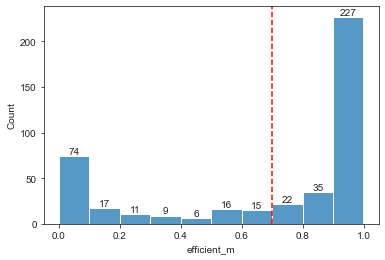

In [43]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'efficient_m', data = df_demo);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df_demo[df_demo['efficient_m'] > 0.7])/len(df_demo['efficient_m'])

list(df_demo[df_demo['efficient_m'] > 0.7]['review_lower'][1:2])


[Text(0, 0, '42'),
 Text(0, 0, '12'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '15'),
 Text(0, 0, '296')]

0.7824074074074074

['[this review was collected as part of a promotion.] grass grows fast and a lot of weeds. this works excellent in killing the weeds out. definitely recommend . . it was easy to use just hook it to a hose and start spray. i had a section of grass that had weeds through out it ..']

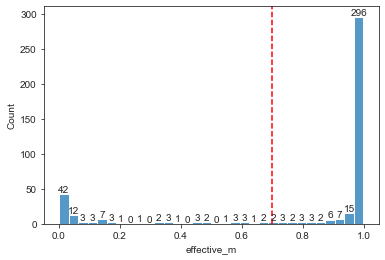

In [44]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'effective_m', data = df_demo);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df_demo[df_demo['effective_m'] > 0.7])/len(df_demo['effective_m'])

list(df_demo[df_demo['effective_m'] > 0.7]['review_lower'][1:2])

[Text(0, 0, '105'),
 Text(0, 0, '26'),
 Text(0, 0, '34'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '19'),
 Text(0, 0, '29'),
 Text(0, 0, '37'),
 Text(0, 0, '29'),
 Text(0, 0, '98')]

0.37962962962962965

['[this review was collected as part of a promotion.] grass grows fast and a lot of weeds. this works excellent in killing the weeds out. definitely recommend . . it was easy to use just hook it to a hose and start spray. i had a section of grass that had weeds through out it ..']

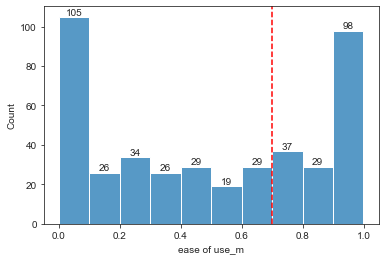

In [46]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'ease of use_m', data = df_demo);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df_demo[df_demo['ease of use_m'] > 0.7])/len(df_demo['ease of use_m'])


list(df_demo[df_demo['ease of use_m'] > 0.7]['review_lower'][0:1])

In [26]:
df_uncat = df_demo[df_demo['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 429
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          48 non-null     int64  
 1   segment               48 non-null     object 
 2   review_id             48 non-null     int64  
 3   product_name          48 non-null     object 
 4   producturl            48 non-null     object 
 5   retailer              48 non-null     object 
 6   brand                 48 non-null     object 
 7   retailer_product_id   48 non-null     object 
 8   base_id               48 non-null     object 
 9   variants_flag         48 non-null     object 
 10  review_creation_date  48 non-null     object 
 11  year                  48 non-null     int64  
 12  month                 48 non-null     int64  
 13  week                  48 non-null     int64  
 14  review_title          47 non-null     object 
 15  review_text           48

In [27]:
df_uncat.to_csv('data/unlabeld_data.csv')

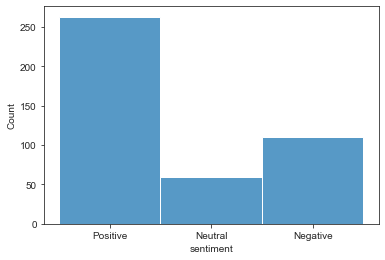

In [28]:
fig, ax = plt.subplots();
ax = sns.histplot(x = 'sentiment', data = df_demo);

# nGrams with uncat data

In [29]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [30]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df_uncat["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [31]:
list(df_uncat['review_lower'])[1:3]

['apperently applied to late for over seeding on a hill and seed didnt germinate.',
 'didnt kill the clover as advertised']

In [32]:
df_uncat

,Unnamed: 0.1,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,cost_m,efficient_m,effective_m,ease of use_m,sentiment
1,1654,Garden,12228,IMAGE Herbicide Brush & Vine Killer Concentrate,http://www.homedepot.com/p/t/100201080,Homedepot,Image for Weeds,100201080,100201080,No,2021-06-25T00:00:00,2021,6,25,waiting for it to work. Will write more later...,waiting for it to work. Will write more later,organic reviews,20.44,3,0,0,0,No,waiting for it to work. will write more later,2021-06-25,10,0.325730,0.027556,0.012378,0.095561,Positive
4,9602,Garden,70299,Annual Ryegrass 50lb bag,http://www.homedepot.com/p/100333277,Homedepot,Pennington Grass,100333280,100333277,Yes,2021-12-17T00:00:00,2021,12,50,Fall over seeding,Apperently applied to late for over seeding on...,organic reviews,66.97,3,0,0,0,No,apperently applied to late for over seeding on...,2021-12-17,14,0.512670,0.004041,0.107014,0.000599,Neutral
5,10618,Garden,72210,Image Herbicide for St. Augustinegrass & Centi...,http://www.homedepot.com/p/303594294,Homedepot,Image for Weeds,303594320,303594294,Yes,2022-01-12T00:00:00,2022,1,2,Didnt kill the clover as advertised...,Didnt kill the clover as advertised,organic reviews,10.32,1,0,0,0,No,didnt kill the clover as advertised,2022-01-12,6,0.484849,0.661762,0.141271,0.241425,Negative
8,21103,Garden,132860,Pennington Wild Bird Food Blend Bucket,http://www.homedepot.com/p/312026384,Homedepot,Pennington Bird,312026398,312026384,Yes,2022-05-20T00:00:00,2022,5,20,Came in convenient size bag. Only problem the ...,Came in convenient size bag. Only problem the ...,organic reviews,22.98,5,0,0,0,No,came in convenient size bag. only problem the ...,2022-05-20,15,0.142433,0.384228,0.167885,0.296941,Positive
12,11109,Garden,72701,Pennington Select Black Oil Sunflower Seed 20lb,https://www.walmart.com//ip/Pennington-Select-...,Walmart,Pennington Bird,44496029,44496029,Yes,2022-01-10T00:00:00,2022,1,2,Not the best quality.,"Lots of debris, tiny sticks in with the seed. ...",organic reviews,14.12,2,0,0,0,No,"lots of debris, tiny sticks in with the seed. ...",2022-01-10,10,0.207587,0.000266,0.000886,0.000187,Negative
21,3005,Garden,27884,Lawn Booster Sun & Shade 35lb bag,http://www.homedepot.com/p/t/311569529,Homedepot,Pennington Grass,311569529,311569530,Yes,2021-10-31T00:00:00,2021,10,43,Grass did not sprout tryed twice the first tim...,Grass did not sprout tryed twice the first tim...,organic reviews,47.99,1,0,0,0,No,grass did not sprout tryed twice the first tim...,2021-10-31,30,0.326833,0.028780,0.018224,0.003019,Neutral
24,27361,Garden,143293,Smart Seed Sun & Shade Mixture 3lb bag,http://www.homedepot.com/p/314933321,Homedepot,Pennington Grass,314933321,314933321,Yes,2022-06-30T00:00:00,2022,6,26,"Grass didnt grow, even with putting down mushr...","Grass didnt grow, even with putting down mushr...",organic reviews,12.94,2,0,0,0,No,"grass didnt grow, even with putting down mushr...",2022-06-30,11,0.344400,0.009591,0.013924,0.006072,Negative
28,9100,Garden,68972,Kentucky 31 Tall Fescue,https://www.homedepot.com/p/Pennington-10-lbs-...,Homedepot,Pennington Grass,204711466,306924565,Yes,2021-11-02T00:00:00,2021,11,44,Total coverage Misleading!!!!,"It states that it should cover about 4,000 sq ...",organic reviews,21.98,3,0,0,0,No,"it states that it should cover about 4,000 sq ...",2021-11-02,20,0.387441,0.043796,0.358517,0.020087,Negative
40,6737,Garden,66575,MOSS OUT! For Lawns 20 lb Granules,https://www.walmart.com//ip/Lilly-Miller-Moss-...,Walmart,Moss Out,16795015,16795015,No,2021-11-30T00:00:00,2021,11,48,moss out,[This review was collected as part of a promot...,organic reviews,14.97,4,0,0,0,Yes,[this review was collected as part of a promot...,2021-11-30,41,0.525576,0.520121,0.546518,0.638721,Positive
42,11743,Garden,73406,22.5 lbs. Wi